In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Importing all datasets
churn_data =pd.read_csv('churn_data-1.csv') 
customer_data = pd.read_csv('customer_data-1.csv') 
internet_data = pd.read_csv('internet_data-1.csv') 

In [ ]:
#Merging churn_data and customer_data on 'customerID' using inner join on customerID
df_1 =pd.merge(churn_data,customer_data,how='inner',on='customerID')


In [ ]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom =pd.merge(df_1,internet_data,how='inner',on='customerID')



In [ ]:
# Let's see the head of our master dataset
telecom.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
#Lets see statistical description for our master data
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [ ]:
# Let's see the type of each column
telecom.dtypes


customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

In [ ]:
# Converting Yes to 1 and No to 0 using map
telecom['PhoneService'] =telecom['PhoneService'].map({'Yes':1,'No':0})

telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1,'No':0})

telecom['Churn'] = telecom['Churn'].map({'Yes':1,'No':0})

telecom['Partner'] = telecom['Partner'].map({'Yes':1,'No':0})

telecom['Dependents'] = telecom['Dependents'].map({'Yes':1,'No':0})


In [ ]:
# Creating a dummy variable for the variable 'Contract' and keeping drop_first=True
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#cont = cont.drop(columns=cont.columns[0])

#Adding the results to the master dataframe i.e telecom
telecom = pd.concat([telecom,cont],axis=1)



# Creating a dummy variable for the variable 'PaymentMethod' and keeping drop_first=True
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)

#Adding the results to the master dataframe
telecom =pd.concat([telecom,pm],axis=1) 


# Creating a dummy variable for the variable 'gender' and keeping drop_first=True
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)


#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)


# Creating a dummy variable for the variable 'MultipleLines' and keeping drop_first=True
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines',drop_first=True)

#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1) 


#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)


# Creating a dummy variable for the variable 'InternetService' and keeping drop_first=True
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)


# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity',drop_first=True)

#drop OnlineSecurity_No internet service column from os
os1= os.drop(['OnlineSecurity_No internet service'],axis=1) 

#Adding os1 to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)



# Creating a dummy variable for the variable 'OnlineBackup' and keeping drop_first=True
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup',drop_first=True)


#dropping OnlineBackup_No internet service from ob
ob1 =ob.drop(['OnlineBackup_No internet service'],axis=1)

#Adding the results(ob1) to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)


# Creating a dummy variable for the variable 'DeviceProtection' and keeping drop_first=True
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection',drop_first=True)

#dropping DeviceProtection_No internet service
dp1 =dp.drop(['DeviceProtection_No internet service'],1)

#Adding the results(dp1) to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)



# Creating a dummy variable for the variable 'TechSupport' and keeping drop_first=True
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport',drop_first=True)

#dropping TechSupport_No internet service from ts
ts1 = ts.drop(['TechSupport_No internet service'] ,axis=1)


#Adding the results(ts1) to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)



# Creating a dummy variable for the variable 'StreamingTV' and keeping drop_first=True
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV',drop_first=True)

#dropping StreamingTV_No internet service from st
st1 = st.drop(['StreamingTV_No internet service'],axis=1)


#Adding the results(st1) to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)


# Creating a dummy variable for the variable 'StreamingMovies' and keeping drop_first=True 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies',drop_first=True)


#dropping StreamingMovies_No internet service from sm
sm1 = sm.drop(['StreamingMovies_No internet service'],axis=1)
#Adding the results(sm1) to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
# drop all duplicate columns
telecom =telecom.drop(['Contract',
'PaymentMethod',
'gender',
'MultipleLines',
'InternetService', 
'OnlineSecurity', 
'OnlineBackup', 
'DeviceProtection',
'TechSupport', 
'StreamingTV', 
'StreamingMovies'],1) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [ ]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce') 

In [ ]:
# again check data type informationof our master dataset
telecom.dtypes


customerID                                object
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                          uint8
Contract_Two year                          uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
gender_Male                                uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_Yes    

Now we can see we have all variables as integer.

In [ ]:
# Getting all continues variables in separate dataframe
num_telecom = telecom[['MonthlyCharges','tenure','SeniorCitizen','TotalCharges']]


In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.99])


,MonthlyCharges,tenure,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,64.761692,32.371149,0.162147,2283.300441
std,30.090047,24.559481,0.368612,2266.771362
min,18.250000,0.000000,0.000000,18.800000
25%,35.500000,9.000000,0.000000,401.450000
50%,70.350000,29.000000,0.000000,1397.475000
75%,89.850000,55.000000,0.000000,3794.737500
90%,102.600000,69.000000,1.000000,5976.640000
99%,114.729000,72.000000,1.000000,8039.883000
max,118.750000,72.000000,1.000000,8684.800000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### **`Checking for Missing Values and Inputing Them`**

<p style='text-align: right;'> 5 points</p>


In [ ]:
# Checking total missing values (column-wise)
telecom.isnull().sum()


customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_Yes                        0
OnlineBackup_Yes                          0
DeviceProtection_Yes                      0
TechSupport_Yes                 

In [ ]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [ ]:
# Checking the percentage of missing values

round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_Yes                         0.00
DeviceProtection_Yes              

It means that 11/7043 = 0.001561834 i.e 0.15%, the best option to get rid of these null values in this scenario is to remove these observations from the analysis

In [ ]:
# Removing NaN form TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]


In [ ]:
# Getting all desired continues variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df = telecom[['tenure','MonthlyCharges','TotalCharges']]


In [ ]:
# Standardising above continuous features

std_df=(df-df.mean())/df.std()


In [ ]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised fetaures 
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Add std_df into telecom
telecom = pd.concat([telecom,std_df],axis=1)


In [ ]:
# print telecom tail
telecom.tail()


,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,0,1,0,1,1,1,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,0,0,1,1,0,1,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,-1.157934,0.319145,-0.872033
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1.368012,1.357835,2.012201


### **`Checking the Churn Rate`**

<p style='text-align: right;'> 2 points</p>


In [ ]:
#caluclating total churn percentage in our master dataframe
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100


In [ ]:
# print churn
print(churn)


26.578498293515356


We have almost 27% churn rate

In [ ]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
X =telecom.drop(['Churn','customerID'],1)


# Putting response variable to y
y = telecom['Churn']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# print y head
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### **`Running Your First Training Model`**

In [ ]:
import statsmodels.api as sm



Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

Reference:

In [ ]:
# adding constant to X
X=sm.add_constant(X)
from sklearn.model_selection import train_test_split
# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Logistic regression model
logm1 = sm.Logit(y_train,X_train)
logm1.fit().summary()




Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Thu, 13 Oct 2022   Pseudo R-squ.:                  0.2912
Time:                        13:05:19   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

In [ ]:
X.drop(['Partner','Dependents','PaymentMethod_Electronic check','gender_Male','InternetService_No','DeviceProtection_No','DeviceProtection_Yes'],axis=1)

KeyError: ignored

In [ ]:
# Importing matplotlib and seaborn


%matplotlib inline

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize=(20,15))
       # Size of the figure
sns.heatmap(X.corr(),annot=True)


In [ ]:
# Write a correlation function to drop correlleation function to remove highly correlated variables (>70%)
def correlation(dataset, threshold):
    # Set of all the names of correlated columns
    col_corr =set()
    
    # apply corr method on dataset
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):

            # we are interested in absolute coeff value 
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname =corr_matrix.columns[i] 
                # add in col_corr 
                col_corr.add(colname)

    return col_corr
    

In [ ]:
# call the function with threshold
corr_features =correlation(X,0.7)

len(set(corr_features))

In [ ]:
# print corr_features
print(corr_features)




In [ ]:
# Lets drop the above variables from X
X.drop(['MonthlyCharges','TotalCharges'],1)



In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# empyty dataframe
vif = pd.DataFrame()

#variables names with all variables in column X
vif['variable']=X.columns

# Vif scores for corresponding features
vif['VIF']=[round(variance_inflation_factor(X.values,i),2) for i in range (X.shape[1])]


In [ ]:
# print vif

print(vif)

                                 variable      VIF
0                                   const  1538.39
1                            PhoneService    34.89
2                        PaperlessBilling     1.21
3                           SeniorCitizen     1.15
4                                 Partner     1.46
5                              Dependents     1.38
6                       Contract_One year     1.63
7                       Contract_Two year     2.65
8   PaymentMethod_Credit card (automatic)     1.56
9          PaymentMethod_Electronic check     1.98
10             PaymentMethod_Mailed check     1.86
11                            gender_Male     1.00
12                      MultipleLines_Yes     7.29
13            InternetService_Fiber optic   148.50
14                     InternetService_No   104.21
15                     OnlineSecurity_Yes     6.34
16                       OnlineBackup_Yes     6.80
17                   DeviceProtection_Yes     6.92
18                        TechS

In [ ]:
# Lets drop above variables also from X
X.drop(['OnlineSecurity_Yes','OnlineBackup_Yes',
'TechSupport_Yes',
'StreamingTV_Yes',
'StreamingMovies_Yes'],1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,const,PhoneService,PaperlessBilling,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_Yes,tenure,MonthlyCharges,TotalCharges
0,1.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,-1.280157,-1.161611,-0.994123
1,1.0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0.064298,-0.260859,-0.173727
2,1.0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,-1.239416,-0.363897,-0.959581
3,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0.512450,-0.747797,-0.195234
4,1.0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,1,-0.343113,0.664821,-0.129171
7039,1.0,1,1,0,1,1,1,0,1,0,0,0,1,1,0,1,1.612459,1.276402,2.240896
7040,1.0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,-0.872746,-1.169921,-0.854453
7041,1.0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,-1.157934,0.319145,-0.872033


In [ ]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)


# call logit method on sm and pass train data
logm2 =sm.Logit(y_train,X_train)
logm2.fit().summary()


# call fit and summary on logm2



Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Thu, 13 Oct 2022   Pseudo R-squ.:                  0.2912
Time:                        13:06:11   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

Now you can see after removing all multicollinear features we got all P values to zero,  so now we can say that all features are statistically significant.

### **`Feature Selection Using RFE`**

<p style='text-align: right;'> 5 points</p>


Lets do feature selection using LogisticRegression with RFE

In [ ]:
# import RFE and LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initiate LogisticRegression()
logreg =LogisticRegression()


 # Initialise RFE 
rfe =RFE(logreg)
           

# fitting RFE 
rfe = rfe.fit(X,y)


# Printing the boolean results
print(rfe.support_)
    
# Printing the ranking
print(rfe.ranking_)

           

[False False  True False False False  True  True False  True False False
  True  True  True False False False False  True  True  True  True  True]
[12  4  1  5 13  6  1  1  8  1  9 11  1  1  1  2  7 10  3  1  1  1  1  1]


In [ ]:
# printing column names which were suppported by RFE
X.columns[(rfe.support_)]


Index(['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
# Variables selected by RFE 
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# Let's run the model using the selected variables but this time we will use Logistic Regression
from sklearn import metrics

#initialise Logistic Regression
logsk =LogisticRegression()


#fitting model using above columns as input
logsk.fit(X_train[col],y_train)


LogisticRegression()

In [ ]:
#recreating the model with StatsModels with RFE selecte columns

logm3 =sm.Logit(y_train,X_train[col])
logm3.fit().summary()


Optimization terminated successfully.
         Current function value: 0.441409
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4910
Method:                           MLE   Df Model:                           11
Date:                Thu, 13 Oct 2022   Pseudo R-squ.:                  0.2318
Time:                        13:06:34   Log-Likelihood:                -2172.6
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                1.796e-274
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
PaperlessBilling                  -0.1033      0.081     -1.279      0.201      -0.262       0.055
Contract_One year                 -1.4866      0.115    -12.892      0.000      -1.713      -1.261
Contract_Two year                 -2.4876      0.196    -12.663      0.000      -2.873      -2.103
PaymentMethod_Electronic check     0.2523      0.080      3.144      0.002       0.095       0.410
MultipleLines_Yes                 -0.2945      0.086     -3.413      0.001      -0.464      -0.125
InternetService_Fiber optic       -0.4409      0.130     -3.379      0.001      -0.697      -0.185
InternetService_No                -0.7165      0.204     -3.520      0.000      -1.115      -0.318
StreamingTV_Yes                   -0.2359      0.094     -2.499      0.012      -0.421      -0.051
StreamingMovies_Yes               -0.3131      0.093     -3.360      0.001      -0.496      -0.131
tenure                            -0.8412      0.165     -5.113      0.000      -1.164      -0.519
MonthlyCharges                     0.9508      0.131      7.264      0.000       0.694       1.207
TotalCharges                       0.3268      0.181      1.801      0.072      -0.029       0.682
==================================================================================================
"""

### **`Making Predictions`**

<p style='text-align: right;'> 14 points</p>


In [ ]:
# Predicted probabilities
y_pred =logsk.predict_proba(X_test[col])


In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)


In [ ]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]


In [ ]:
# Let's see the head
y_pred_1.head()


,1
0,0.471290
1,0.320742
2,0.005823
3,0.616422
4,0.006817


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [ ]:
# Putting CustID to index
y_test_df['CustID']=y_test_df.index


In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)



In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final =pd.concat([y_test_df,y_pred_1],1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={1:'churn_prob'})


In [ ]:
#print y_pred_final
y_pred_final


,Churn,CustID,churn_prob
0,0,942,0.471290
1,1,3730,0.320742
2,0,1761,0.005823
3,1,2283,0.616422
4,0,1872,0.006817
...,...,...,...
2105,0,1289,0.013929
2106,0,3508,0.067841
2107,0,6765,0.003138
2108,0,3598,0.401858


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID','Churn','churn_prob'])


In [ ]:
# Let's see the head of y_pred_final

y_pred_final.head()

,CustID,Churn,churn_prob
0,942,0,0.471290
1,3730,1,0.320742
2,1761,0,0.005823
3,2283,1,0.616422
4,1872,0,0.006817


In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted']=y_pred_final.churn_prob.map(lambda x: 1 if x>0.5 else 0)


In [ ]:
# Let's see the head
y_pred_final.head()


,CustID,Churn,churn_prob,predicted
0,942,0,0.471290,0
1,3730,1,0.320742,0
2,1761,0,0.005823,0
3,2283,1,0.616422,1
4,1872,0,0.006817,0


In [ ]:
# import metrics 
from sklearn import metrics


In [ ]:
# Lets check what all things python provides us in confusion matrix using help function.
help(metrics.confusion_matrix)


Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [ ]:
# get Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.predicted)
print(confusion)

[[1356  172]
 [ 251  331]]


In [ ]:
# meaning of above confusion matrix is

# Predicted     not_churn    churn
# Actual
# not_churn        1363      165
# churn            273       309

In [ ]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.predicted)


0.7995260663507109

In [ ]:
# Lets check true positive ,true negatives,false positives and false negatives

TP = confusion[1,1]               # true positive 
TN = confusion[0,0]               # true negatives
FP = confusion[0,1]              # false positives
FN = confusion[1,0]              # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FP)


0.658051689860835

In [ ]:
# Let us calculate specificity
TN/float(FP+TN)


0.887434554973822

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned

FP/float(FP+TN)

0.112565445026178

In [ ]:
# positive predictive value #Precison
TP/float(FP+TP)


0.658051689860835

In [ ]:
# Negative predictive value
TN/float(TN+FN)


0.8438083385189795

You can also use classification_report to get precision, recall, f1-score, support

In [ ]:
#  import classification_report
from sklearn.metrics import classification_report
# print classification_report
print(classification_report(y_pred_final.Churn,y_pred_final.predicted))


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1528
           1       0.66      0.57      0.61       582

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.79      0.80      0.79      2110



In [ ]:
# Here we have given you a function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

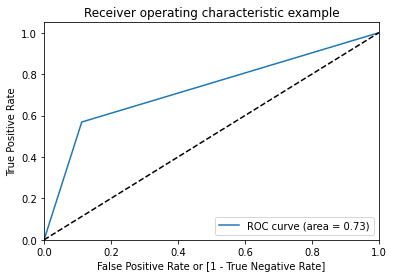

(array([0.        , 0.11256545, 1.        ]),
 array([0.        , 0.56872852, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# Use above function to plot ROC curve

draw_roc(y_pred_final.Churn,y_pred_final.predicted)

In [ ]:
# Let's create columns with different probability cutoffs 

numbers =[float(x)/10 for x in range(10)] 

# loop numbers and append churn probability to y_pred_final for different prob cutoff 
for i in numbers:
    y_pred_final[i]=  y_pred_final.churn_prob.map(lambda x: 1 if x>i else 0)

    
# print  y_pred_final head
print(y_pred_final.head())

   CustID  Churn  churn_prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     942      0    0.471290          0    1    1    1    1    1    0    0   
1    3730      1    0.320742          0    1    1    1    1    0    0    0   
2    1761      0    0.005823          0    1    0    0    0    0    0    0   
3    2283      1    0.616422          1    1    1    1    1    1    1    1   
4    1872      0    0.006817          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  


In [ ]:
# Create an empty dataframe with columns 'prob','accuracy','sensi' and 'speci'
cutoff_df =pd.DataFrame(columns=['prob','accuracy','sensi' ,'speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

#iterate through num
for i in num:
    #calculate confusion metrics
    cm1 =metrics.confusion_matrix(y_pred_final.Churn,y_pred_final[i])
    
    #total in cm1
    total1=sum(sum(cm1))
    
    #Calculate accuracy
    accuracy =(cm1[0,0]+cm1[1,1])/total1
    
    #calculate specificity
    speci =cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    #calculate sensitivity
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    
    #append rows in cutoff_df with cutoff values, accuracy, sensitivity and specificity
    cutoff_df.loc[i] =[i,accuracy,speci,sensi]

print(cutoff_df)



     prob  accuracy     sensi     speci
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.606635  0.477749  0.945017
0.2   0.2  0.701422  0.648560  0.840206
0.3   0.3  0.749289  0.748037  0.752577
0.4   0.4  0.782464  0.827225  0.664948
0.5   0.5  0.799526  0.887435  0.568729
0.6   0.6  0.790995  0.943717  0.390034
0.7   0.7  0.757820  0.981021  0.171821
0.8   0.8  0.727488  1.000000  0.012027
0.9   0.9  0.724171  1.000000  0.000000


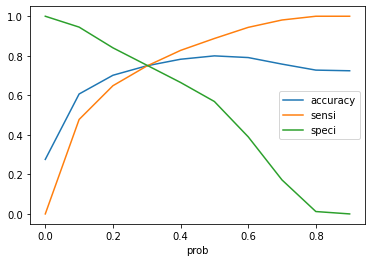

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [ ]:
# Now lets get another column with final_predicted which has 0.3 cutoff probability
y_pred_final['final_pred']=y_pred_final.churn_prob.map(lambda x: 1 if x>0.3 else 0)



In [ ]:
y_pred_final.head()


,CustID,Churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
0,942,0,0.471290,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.320742,0,1,1,1,1,0,0,0,0,0,0,1
2,1761,0,0.005823,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.616422,1,1,1,1,1,1,1,1,0,0,0,1
4,1872,0,0.006817,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Let's check the overall accuracy now again
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.final_pred)


0.7492890995260664

In [ ]:
metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.final_pred)


array([[1143,  385],
       [ 144,  438]])

In [ ]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)



In [ ]:
#initialise Logistic Regression
logs2=LogisticRegression()




#fitting model using above columns as input
logs2.fit(X_train,y_train)


#prediction on test data
y_pred =logs2.predict(X_test)


In [ ]:
# print classification_report
cm = metrics.confusion_matrix(y_test, y_pred)

cm


array([[1353,  175],
       [ 252,  330]])

In [ ]:
#print confusion metrix
score=logs2.score(X_test, y_test)
score

0.7976303317535545

_______________________________